TF 中一切数据皆为张量
张量包括三种类型：1.数值型 2.字符串型 3.布尔型

张量的重要属性是:

- 形状 shape
- 类型 dtype (与精度相关，int16,int32,float32, float64......)
- 值   numpy


In [109]:
import tensorflow as tf
print(tf.__version__)
# 检查gpu 设备是否可用
tf.config.list_physical_devices()

2.2.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

## 1.1 字符串型



In [10]:
a = tf.constant('Hello, Deep learning')
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep learning'>

In [11]:
tf.strings.lower(a)

<tf.Tensor: shape=(), dtype=string, numpy=b'hello, deep learning'>

## 1.2布尔型


In [12]:
tf.constant(True)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## 1.3数值型


- 标量（scalar）,shape ()
- 向量（vector）, shape (n,)
- matrix，shape (m,n)
- dim>2,统称为张量，张量的每个维度也叫 Axis

>一般维度代表了具体的物理含义，比如 Shape 为[2,32,32,3]的张量共有 4 维，如果表 示图片数据的话，每个维度/轴代表的含义分别是:图片数量、图片高度、图片宽度、 图片通道数，其中 2 代表了 2 张图片，32 代表了高宽均为 32，3 代表了 RGB 3 个通 道。张量的维度数以及每个维度所代表的具体物理含义需要由用户自行定义

In [72]:
# 定义标量
a =tf.constant(1)
b = tf.constant(1.2)
c= 1.1   # 要使用TF 中规定的方式创建张量
a, b, c, b-c

(<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.2>,
 1.1,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.100000024>)

In [68]:
# 定义向量
a =tf.zeros(shape=(2))
b= tf.Variable(tf.ones([3]))
a,b

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>)

In [67]:
# 定义两个 2x2 的常量矩阵
A= tf.constant([[1.,2.], [3.,4.]])
A

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [69]:
# 自定义shape
input_shape = (1,3,3,4)
tf.ones(input_shape)

<tf.Tensor: shape=(1, 3, 3, 4), dtype=float32, numpy=
array([[[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]], dtype=float32)>

In [70]:
# 也可以通过 转换创建
import numpy as np
a =np.array([[1,2],
         [3,4]])
tf.convert_to_tensor(a)

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[1, 2],
       [3, 4]])>

In [73]:
# 创建序列
tf.range(10, delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8], dtype=int32)>

### 1.3.1 通过分布创建tensor
- 均匀分布

`tf.random.uniform(
    shape, minval=0, maxval=None, dtype=tf.dtypes.float32, seed=None, name=None
)`

从均匀分布中产生数据，范围： [minval, maxval)

默认为： [0, 1)

In [57]:
tf.random.uniform(shape=())

<tf.Tensor: shape=(), dtype=float32, numpy=0.06580174>

In [82]:
a = tf.random.uniform([2,3])  # 采样区间为【0,1）
b= tf.random.uniform([2,3], maxval=100, dtype=tf.int32)  # 采样整形类型数据，同时指定数据类型（精度）
print(a,b,sep='\n')

tf.Tensor(
[[0.44571376 0.77697647 0.8595803 ]
 [0.99427104 0.48246622 0.950542  ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[33 46  5]
 [72 85 24]], shape=(2, 3), dtype=int32)


- 正态分布


In [79]:
a = tf.random.normal([2,2])
b = tf.random.normal([2,2], mean=1,stddev=2)  # 创建均值为1，标准差为2
print(a,b,sep='\n')

tf.Tensor(
[[-0.26303658 -1.1443406 ]
 [-0.8058413  -0.73540556]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 3.7012558  0.7535601]
 [ 1.25575   -1.3778434]], shape=(2, 2), dtype=float32)


- seed 设置

In [84]:
# 可以设置seed ， 保证每次产生一样的随机数
tf.random.set_seed(5)
for _ in range(5):
    a = tf.random.uniform(shape=())
    print(a)

tf.Tensor(0.6263931, shape=(), dtype=float32)
tf.Tensor(0.7017075, shape=(), dtype=float32)
tf.Tensor(0.20179546, shape=(), dtype=float32)
tf.Tensor(0.9412769, shape=(), dtype=float32)
tf.Tensor(0.12393212, shape=(), dtype=float32)


### 1.3.2 多维张量的几何解释
https://cloud.tencent.com/developer/article/1547356

注意，通道的表示

In [100]:
#三维张量，3行4列深度为2的张量
const3 = tf.constant([
                     [[ 1,  2], [ 3,  4], [ 5,  6], [ 7,  8]],
                     [[11, 12], [13, 14], [15, 16], [17, 18]],
                     [[21, 22], [23, 24], [25, 26], [27, 28]]
                     ])
const3

<tf.Tensor: shape=(3, 4, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8]],

       [[11, 12],
        [13, 14],
        [15, 16],
        [17, 18]],

       [[21, 22],
        [23, 24],
        [25, 26],
        [27, 28]]], dtype=int32)>

图示如下：
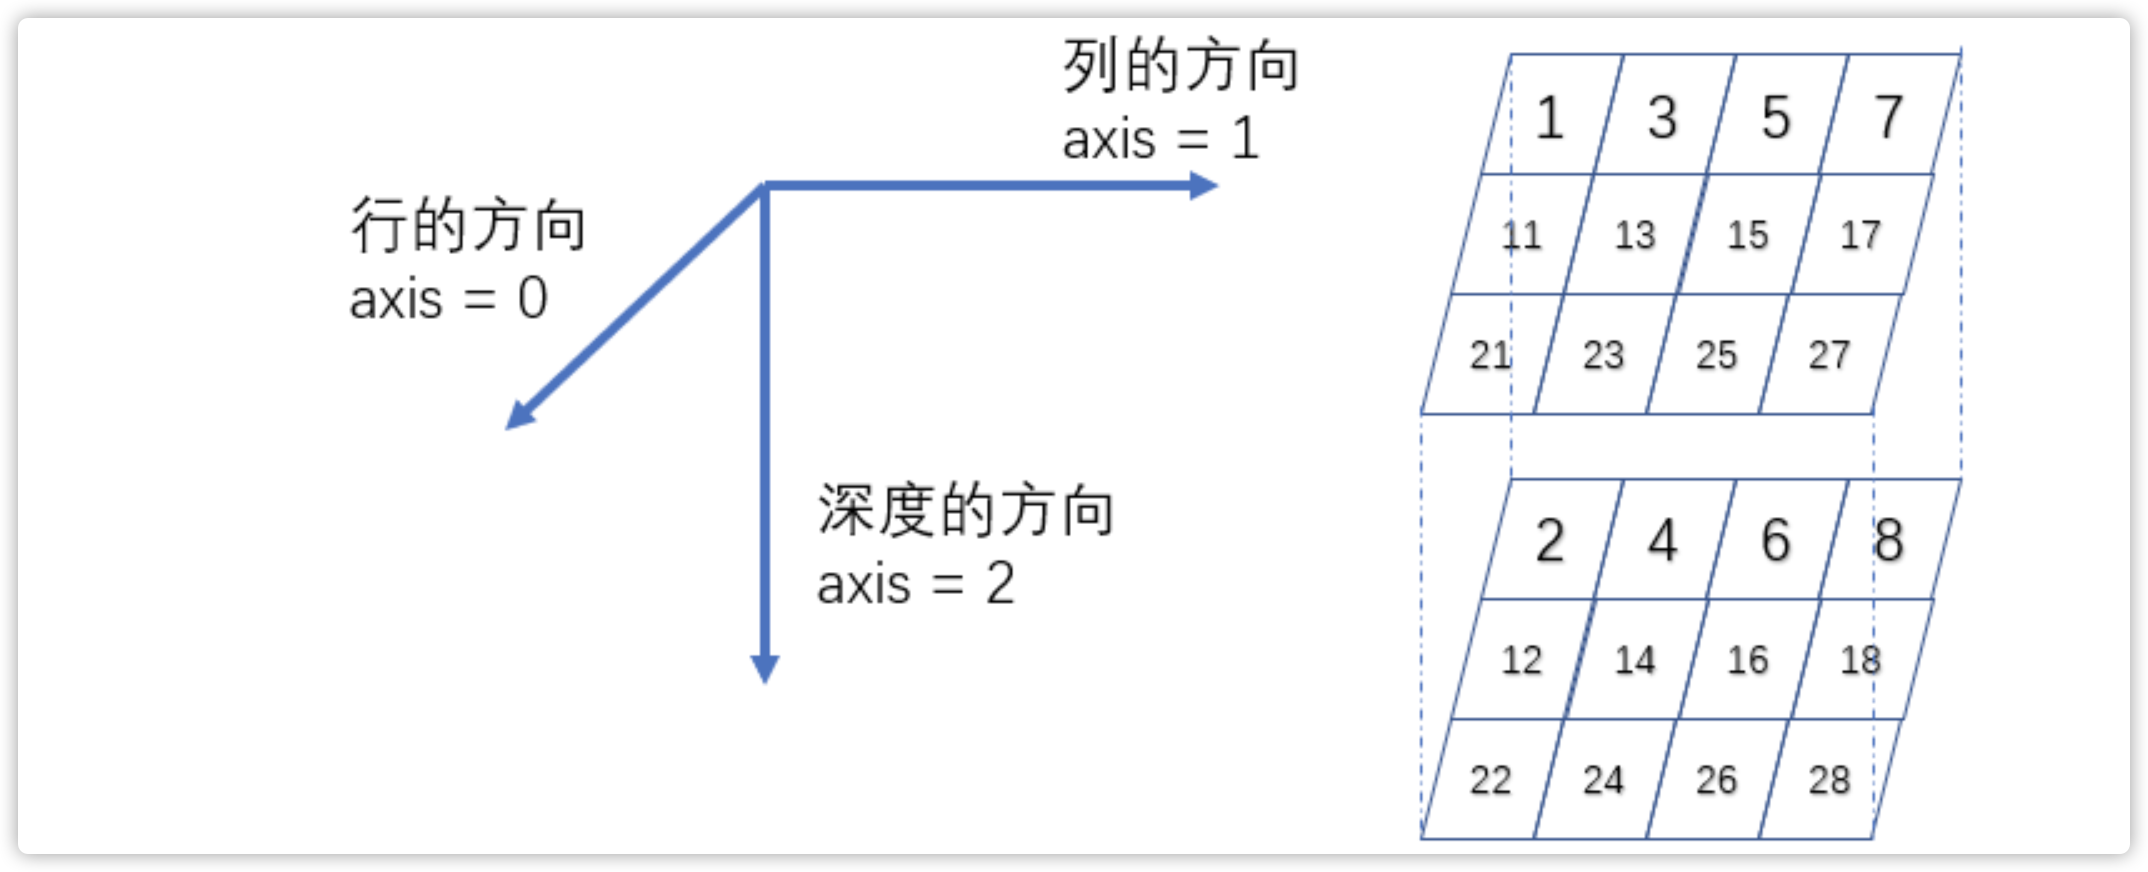
